## Prepare Exercises

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import seaborn as sns

import acquire as ac

import warnings
warnings.filterwarnings("ignore")

In [2]:
store_df = ac.acquire_store_data()

In [3]:
store_df.head(2)

,Unnamed: 0,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [4]:
store_df.shape

(913000, 19)

In [5]:
store_df.store_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Using your store items data:

#### The end result of this exercise should be a file named prepare.py.

### 1. Convert date column to datetime format.


In [6]:
store_df.sale_date = pd.to_datetime(store_df.sale_date)

In [7]:
store_df.head(2)

,Unnamed: 0,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,1,13.0,2013-01-01 00:00:00+00:00,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,1,11.0,2013-01-02 00:00:00+00:00,2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


### 2. Plot the distribution of sale_amount and item_price.


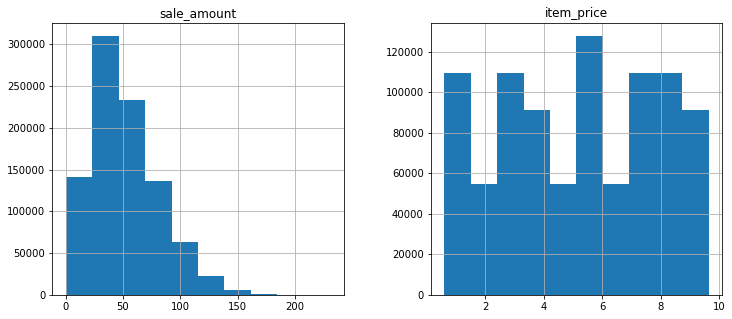

In [8]:
store_df[['sale_amount', 'item_price']].hist(figsize=(12,5))
plt.show()

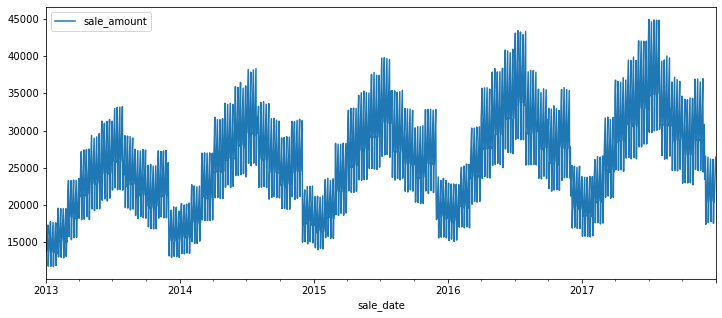

In [9]:
by_date = store_df.groupby(['sale_date']).sale_amount.sum().reset_index()
by_date.plot(x='sale_date', y='sale_amount', figsize=(12, 5))
plt.show()

### 3. Set the index to be the datetime variable.


In [10]:
store_df = store_df.set_index('sale_date').sort_index()

In [11]:
store_df.head(2)

,Unnamed: 0,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,211816,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,11,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


### 4. Add a 'month' and 'day of week' column to your dataframe.


In [12]:
store_df['month'] = store_df.index.month_name()

In [13]:
store_df['day'] = store_df.index.day_name()

In [14]:
store_df.head(2)

,Unnamed: 0,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day
sale_date,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday
2013-01-01 00:00:00+00:00,211816,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,11,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday


### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.


In [15]:
store_df['sales_total'] = store_df.sale_amount * store_df.item_price

In [16]:
store_df.head(1)

,Unnamed: 0,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,...,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,...,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92


In [31]:
#store_df.groupby('item_id').sum()

### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [18]:
# Saved in prepare.py

## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:



In [44]:
opsd = ac.get_opsd_data()

In [45]:
opsd.head()

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN


### 1. Convert date column to datetime format.


In [46]:
opsd.Date = pd.to_datetime(opsd.Date)

In [47]:
opsd.head()

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN


In [48]:
opsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   4383 non-null   int64         
 1   Date         4383 non-null   datetime64[ns]
 2   Consumption  4383 non-null   float64       
 3   Wind         2920 non-null   float64       
 4   Solar        2188 non-null   float64       
 5   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 205.6 KB


In [49]:
opsd.shape

(4383, 6)

### 2. Plot the distribution of each of your variables.


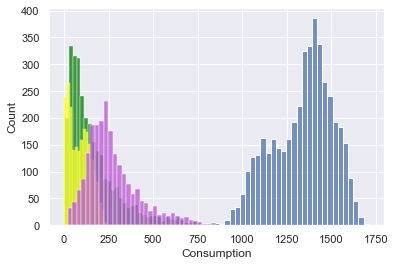

In [50]:
sns.set_theme(style="darkgrid")


sns.histplot(opsd, x="Consumption")
sns.histplot(opsd, x="Wind", color='Green')
sns.histplot(opsd, x="Solar", color='Yellow')
sns.histplot(opsd, x="Wind+Solar", color='mediumorchid')

plt.show()

### 3. Set the index to be the datetime variable.


In [51]:
opsd = opsd.set_index('Date').sort_index()

In [52]:
opsd = opsd.drop(columns='Unnamed: 0')

In [53]:
opsd.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


### 4. Add a month and a year column to your dataframe.


In [54]:
opsd['month'] = opsd.index.month_name()

In [55]:
opsd['year'] = opsd.index.year

In [56]:
opsd.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


### 5. Fill any missing values.


In [57]:
opsd = opsd.fillna(0)

In [58]:
opsd['wind_plus_solar'] = opsd['Wind'] + opsd['Solar']
#opsd[opsd['Wind+Solar'] != (opsd['Wind'] + opsd['Solar'])][['Wind', 'Solar', 'Wind+Solar', 'wind_solar_custm']]

In [59]:
opsd = opsd.drop(columns='Wind+Solar')

In [60]:
opsd.head()

,Consumption,Wind,Solar,month,year,wind_plus_solar
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,January,2006,0.0
2006-01-02,1380.521,0.0,0.0,January,2006,0.0
2006-01-03,1442.533,0.0,0.0,January,2006,0.0
2006-01-04,1457.217,0.0,0.0,January,2006,0.0
2006-01-05,1477.131,0.0,0.0,January,2006,0.0


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
# Done